In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [6]:
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [7]:
from sklearn.preprocessing import StandardScaler
preprocess=StandardScaler()
Scaled_X=preprocess.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
X_train,X_test,Y_train,Y_test=tts(Scaled_X,Y,train_size=0.80,stratify=Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [10]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(X_train,Y_train)
prediction_value=classifier.predict(X_test)
prediction_probability=classifier.predict_proba(X_test)

In [18]:
prediction_value[199],Y_train[199]

(0, 0)

In [19]:
prediction_probability,prediction_probability.shape

(array([[0.42396438, 0.57603562],
        [0.54724826, 0.45275174],
        [0.60469908, 0.39530092],
        ...,
        [0.45390325, 0.54609675],
        [0.58239147, 0.41760853],
        [0.5685135 , 0.4314865 ]]),
 (4414, 2))

In [20]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,prediction_value)
cf

array([[2573,  986],
       [ 300,  555]], dtype=int64)

In [21]:
#Accuracy
classifier.score(X_test,Y_test)

0.7086542818305392

In [22]:
#precision_score
from sklearn.metrics import precision_score
precision=precision_score(Y_test,prediction_value)
precision

0.3601557430240104

In [23]:
#recall_score
from sklearn.metrics import recall_score
recall=recall_score(Y_test,prediction_value)
recall

0.6491228070175439

In [24]:
#f1_score
f1=2/(1/precision+1/recall)
f1

0.46327212020033387

In [39]:
#f1_score
from sklearn.metrics import f1_score
f1=f1_score(Y_test,prediction_value)
f1

0.49804092294296903

In [46]:
# combine all at a time
#precision_score
from sklearn.metrics import precision_recall_fscore_support as PRFS
precision,recall,f1,support=PRFS(Y_test,prediction_value)


In [47]:
precision

array([0.90477793, 0.39667129])

In [48]:
recall

array([0.75554931, 0.66900585])

In [49]:
f1

array([0.82345736, 0.49804092])

In [50]:
support

array([3559,  855], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [53]:
k=classification_report(Y_test,prediction_value)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3559
           1       0.40      0.67      0.50       855

    accuracy                           0.74      4414
   macro avg       0.65      0.71      0.66      4414
weighted avg       0.81      0.74      0.76      4414



In [69]:
# precision _recall_curve
from sklearn.metrics import precision_recall_curve as prc
precison,recall,threshold=prc(Y_test,prediction_probability[:,1])


4413

In [65]:
precison.shape,recall.shape,threshold.shape

((4414,), (4414,), (4413,))

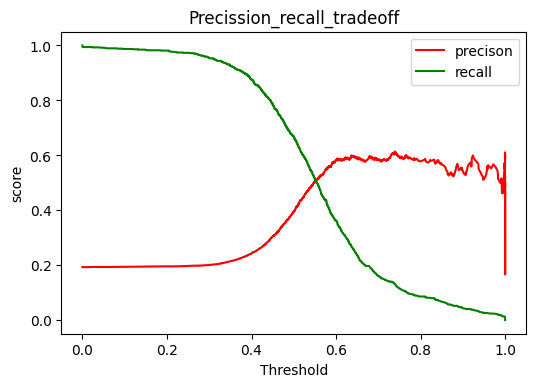

In [72]:
plt.figure(dpi=100)
plt.plot(threshold,precison[:-1],color='red',label='precison')
plt.plot(threshold,recall[:-1],color='green',label='recall')
plt.xlabel('Threshold')
plt.ylabel('score')
plt.title('Precission_recall_tradeoff')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(Y_test,prediction_probability[:,1])


array([0.00000000e+00, 2.80977803e-04, 1.40488901e-03, ...,
       9.99157067e-01, 1.00000000e+00, 1.00000000e+00])

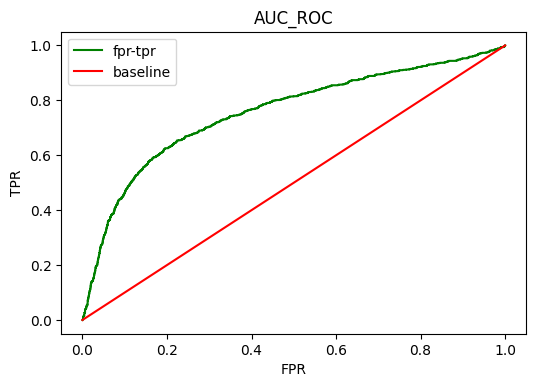

0.7556717259102613

In [80]:
plt.figure(dpi=100)
plt.plot(fpr,tpr,color='green',label='fpr-tpr')
plt.plot([0,1],[0,1],color='red',label='baseline')
plt.title('AUC_ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()
roc_auc_score(Y_test,prediction_probability[:,1])

In [89]:
c=classifier.coef_.reshape(-1)
x=X.columns
coef_table=pd.DataFrame({
    'Coefficient':c,'Variable':x
})
coef_table=coef_table.sort_values(by='Coefficient')
coef_table


,Coefficient,Variable
9,-2.654726,current_balance
10,-0.415926,previous_month_end_balance
17,-0.250708,current_month_balance
0,-0.170176,vintage
13,-0.166204,current_month_credit
12,-0.158956,average_monthly_balance_prevQ2
8,-0.131042,days_since_last_transaction
4,-0.103953,occupation
1,-0.099234,age
2,-0.038662,gender


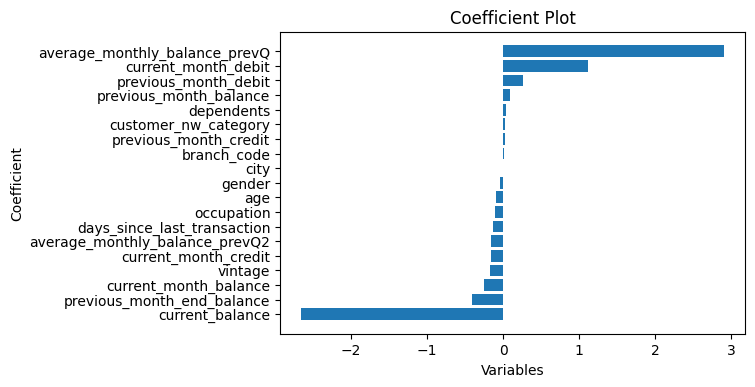

In [93]:
plt.figure(dpi=100)
plt.barh(coef_table['Variable'],coef_table['Coefficient'])
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Coefficient Plot')
plt.show()